In [15]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Transformar imagenes a escala de grises 

x_train = x_train / 255.0
y_train = y_train / 255.0

In [5]:
# Tranfsormar etiquetas a valores del 0-9 con one hot encoding

y_train_oh = to_categorical(y_train, num_classes=10)
y_test_oh = to_categorical(y_test, num_classes=10)

In [6]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

c:\Users\xavif\Documents\MASTER\MNIST\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
history = model.fit(
    x_train,
    y_train_oh,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)

Epoch 1/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.9996 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 2.9802e-09
Epoch 2/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 1.0000 - loss: 1.3808e-09 - val_accuracy: 1.0000 - val_loss: 5.1657e-10
Epoch 3/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 1.0000 - loss: 2.8561e-10 - val_accuracy: 1.0000 - val_loss: 1.8875e-10
Epoch 4/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 1.0000 - loss: 1.0928e-10 - val_accuracy: 1.0000 - val_loss: 7.9473e-11
Epoch 5/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 1.0000 - loss: 3.9736e-11 - val_accuracy: 1.0000 - val_loss: 5.9605e-11
Epoch 6/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 1.0000 - loss: 1.7385e-11 - val_accuracy: 1.0000 - val_loss: 4.9671e-11
Epoch 7/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 1.0000 - loss: 1.2418e-11 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
4800/4800 ━━━━━━━━━━

In [16]:
y_pred_prob = model.predict(x_test)

y_pred = np.argmax(y_pred_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


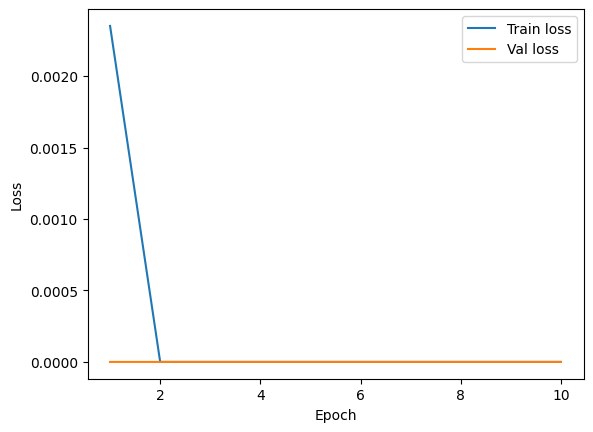

In [9]:
epochs = range(1, len(history.history['loss']) + 1)

plt.plot(epochs, history.history['loss'], label='Train loss')
plt.plot(epochs, history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

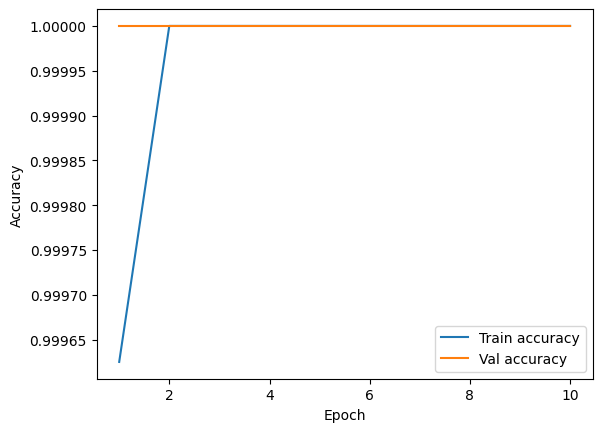

In [10]:
plt.plot(epochs, history.history['accuracy'], label='Train accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

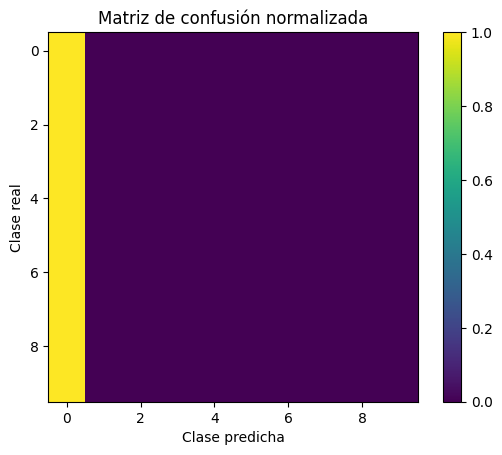

In [18]:
cm = confusion_matrix(y_test, y_pred)

cm_norm = cm / cm.sum(axis=1, keepdims=True)

plt.imshow(cm_norm)
plt.colorbar()
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.title("Matriz de confusión normalizada")
plt.show()